In [22]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sys.path.append('..')
import Functions as f

In [23]:
data = pd.read_csv('../data/secret_polynomial.csv').to_numpy()
random_state = np.random.randint(1, 301)
# splitting the data into training and testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(data[:, 0], data[:, 1], test_size=0.2, random_state=random_state)

- Plotting the training data.

Text(0.5, 1.0, 'Training data')

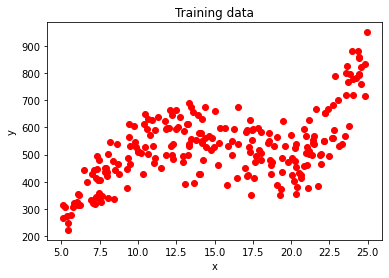

In [24]:
figure, axes = plt.subplots()
axes.scatter(X_train, y_train, color='red')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Training data')

Extending the X_train matrix

In [31]:
Xe_train = np.c_[np.ones((X_train.shape[0],1)) , X_train, X_train**2, X_train**3, X_train**4, X_train**5, X_train**6]
Xn_train = f.feature_normalization(Xe_train)
Xn_train[:, 0] = 1

C:\Users\dimit\OneDrive\Documents\lnu courses\2dv516 - machine learning\assignment2\notebooks\..\Functions.py:31: RuntimeWarning: invalid value encountered in true_divide
  return (Xe - mu) / sigma


Calculating the beta with gradient descent function.

In [26]:
beta_with_normal_eq = np.linalg.inv(Xe_train.T.dot(Xe_train)).dot(Xe_train.T).dot(y_train)
cost = f.cost_function(Xe_train, y_train, beta_with_normal_eq, len(y_train))
print(beta_with_normal_eq)
print(cost)

[ 3.15412401e+02 -1.21154354e+02  3.36594411e+01 -2.65966575e+00
  7.79713931e-02 -6.46780935e-04]
4997.955776604693


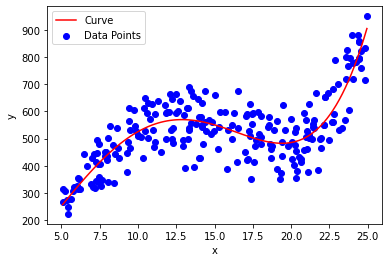

In [30]:
X = np.vstack([X_train, X_train**2, X_train**3, X_train**4, X_train**5]).T
beta = f.normal_equation(X, y_train)
beta_xe = f.normal_equation(Xe_train, y_train)
x_curve = np.linspace(X_train.min(), X_train.max(), 100)
X_curve = np.vstack([x_curve, x_curve**2, x_curve**3, x_curve**4, x_curve**5]).T
y_curve = X_curve.dot(beta)
plt.scatter(X_train, y_train, color='b', label='Data Points')

plt.plot(x_curve, y_curve, color='r', label='Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
degree = 1
for i in range(len(axes)):

    axes[i].scatter(X_train, y_train, label='Training Data')
    axes[i].plot(x_curve, y_curve, color='r', label='Curve')
    axes[i].set_xlabel('X' + str(i))
    axes[i].set_ylabel('y')
    axes[i].legend()
    degree += 1